In [27]:
import pandas as pd
import numpy as np

In [2]:
!head data/shop_info.txt

1,湖州,885,8,4,12,2,美食,休闲茶饮,饮品/甜点
2,哈尔滨,64,19,,,1,超市便利店,超市,
3,南昌,774,5,3,2,0,美食,休闲茶饮,奶茶
4,天津,380,18,,,1,超市便利店,超市,
5,杭州,263,2,2,2,0,美食,休闲食品,生鲜水果
6,大连,1139,13,3,1,0,美食,烘焙糕点,面包
7,绍兴,145,13,3,9,2,美食,快餐,西式快餐
8,杭州,234,16,3,1,0,美食,休闲食品,生鲜水果
9,杭州,1120,15,4,0,1,超市便利店,超市,
10,孝感,98,10,,,0,超市便利店,超市,


In [18]:
df_shop_info = pd.read_csv('data/shop_info.txt', header=None)
df_shop_info.columns = ['shop_id', 'city_name', 'location_id', 'avg_pay', 
                        'user_score', 'user_comment_cnt', 'shop_level',
                        'category_1', 'category_2', 'category_3']
df_shop_info.head()

,shop_id,city_name,location_id,avg_pay,user_score,user_comment_cnt,shop_level,category_1,category_2,category_3
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果


In [19]:
len(df_shop_info)

2000

In [20]:
df_shop_info.category_1.fillna('', inplace=1)
df_shop_info.category_2.fillna('', inplace=1)
df_shop_info.category_3.fillna('', inplace=1)

In [21]:
user_score_na = df_shop_info.user_score.isnull()
comment_cnt_na = df_shop_info.user_comment_cnt.isnull()

In [22]:
(user_score_na == comment_cnt_na).all()

True

In [23]:
df_shop_info['no_user_info'] = user_score_na.astype('uint8')
df_shop_info.user_score.fillna(0, inplace=1)
df_shop_info.user_comment_cnt.fillna(0, inplace=1)

In [29]:
(df_shop_info.shop_id == np.arange(1, 2001)).all()

True

In [30]:
df_shop_info.shop_id = df_shop_info.shop_id - 1

In [48]:
df_shop_info.shop_id = df_shop_info.shop_id.astype('uint16')
df_shop_info.avg_pay = df_shop_info.avg_pay.astype('uint8')
df_shop_info.location_id = df_shop_info.location_id.astype('uint16')
df_shop_info.shop_level = df_shop_info.shop_level.astype('uint8')

In [52]:
df_shop_info.head()

,shop_id,city_name,location_id,avg_pay,user_score,user_comment_cnt,shop_level,category_1,category_2,category_3,no_user_info
0,0,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点,0
1,1,哈尔滨,64,19,0.0,0.0,1,超市便利店,超市,,1
2,2,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶,0
3,3,天津,380,18,0.0,0.0,1,超市便利店,超市,,1
4,4,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果,0


In [32]:
!ls data/

shop_info.txt  user_pay.txt  user_view.txt


In [36]:
!head data/user_pay.txt
!wc -l data/user_pay.txt

22127870,1862,2015-12-25 17:00:00
3434231,1862,2016-10-05 11:00:00
16955285,1862,2016-02-10 15:00:00
13799128,1862,2016-01-13 14:00:00
13799128,1862,2016-07-05 12:00:00
20244878,1862,2016-09-17 15:00:00
20244878,1862,2016-05-29 16:00:00
438444,1862,2016-02-22 17:00:00
22003193,1862,2016-08-07 15:00:00
20244878,1862,2016-04-17 16:00:00
69674110 data/user_pay.txt


In [88]:
df_user_pay = pd.read_csv('data/user_pay.txt', header=None)
df_user_pay.columns = ['user_id', 'shop_id', 'ts']
df_user_pay.shop_id = df_user_pay.shop_id.astype('uint16')
df_user_pay.user_id = df_user_pay.user_id.astype('uint32')
df_user_pay.ts = pd.to_datetime(df_user_pay.ts)
df_user_pay['day'] = df_user_pay.ts.dt.floor(freq='d')

In [92]:
!head data/user_view.txt
!wc -l data/user_view.txt

13201967,1197,2016-10-21 18:00:00
19461365,1197,2016-06-28 23:00:00
15022321,1197,2016-07-16 19:00:00
5440872,1197,2016-07-15 07:00:00
12594529,1197,2016-08-07 16:00:00
5440872,1197,2016-08-12 08:00:00
19918044,1197,2016-09-03 16:00:00
9476039,1197,2016-09-04 17:00:00
4081995,1197,2016-09-25 10:00:00
12594529,1197,2016-08-07 16:00:00
5556715 data/user_view.txt


In [93]:
df_user_view = pd.read_csv('data/user_view.txt', header=None)
df_user_view.columns = ['user_id', 'shop_id', 'ts']
df_user_view.shop_id = df_user_view.shop_id.astype('uint16')
df_user_view.user_id = df_user_view.user_id.astype('uint32')
df_user_view.ts = pd.to_datetime(df_user_view.ts)
df_user_view['day'] = df_user_view.ts.dt.floor(freq='d')

In [95]:
len(df_user_pay), len(df_user_view)

(69674110, 5556715)

In [96]:
df_user_pay.ts.min(), df_user_pay.ts.max()

(Timestamp('2015-06-26 06:00:00'), Timestamp('2016-10-31 23:00:00'))

In [97]:
df_user_view.ts.min(), df_user_view.ts.max()

(Timestamp('2016-06-22 00:00:00'), Timestamp('2016-10-31 23:00:00'))

In [108]:
import feather

In [109]:
feather.write_dataframe(df_shop_info, 'data/df_shop_info.feather')
feather.write_dataframe(df_user_pay, 'data/df_user_pay.feather')
feather.write_dataframe(df_user_view, 'data/df_user_view.feather')

In [110]:
!ls -lh data

total 3.9G
-rw-r--r-- 1 agrigorev agrigorev 137K Feb  9 15:22 df_shop_info.feather
-rw-r--r-- 1 agrigorev agrigorev 1.5G Feb  9 15:22 df_user_pay.feather
-rw-r--r-- 1 agrigorev agrigorev 117M Feb  9 15:22 df_user_view.feather
-rw-r--r-- 1 agrigorev agrigorev 100K Dec 23 06:47 shop_info.txt
-rw-r--r-- 1 agrigorev agrigorev 2.2G Dec 23 06:52 user_pay.txt
-rw-r--r-- 1 agrigorev agrigorev 175M Dec 23 06:53 user_view.txt


In [111]:
df_shop_info = feather.read_dataframe('data/df_shop_info.feather')
df_user_pay = feather.read_dataframe('data/df_user_pay.feather')
df_user_view = feather.read_dataframe('data/df_user_view.feather')

In [117]:
df_views = df_user_view.groupby(by=['shop_id', 'day']).user_id.count().reset_index()
df_views.rename(columns={'user_id': 'views_count'}, inplace=1)

In [126]:
df_views.shop_id = df_views.shop_id.astype('uint16')
df_views.views_count = df_views.views_count.astype('uint16')

In [122]:
df_pays = df_user_pay.groupby(by=['shop_id', 'day']).user_id.count().reset_index()
df_pays.rename(columns={'user_id': 'pays_count'}, inplace=1)

In [134]:
df_pays.shop_id = df_pays.shop_id.astype('uint16')
df_pays.views_count = df_pays.pays_count.astype('uint16')

In [135]:
feather.write_dataframe(df_views, 'data/df_views_agg.feather')
feather.write_dataframe(df_pays, 'data/df_pays_agg.feather')

In [144]:
last_day = df_pays.groupby('shop_id').day.max()
last_day[last_day < pd.to_datetime('2016-10-31')]

shop_id
987    2016-10-30
1707   2016-10-24
1824   2016-10-10
Name: day, dtype: datetime64[ns]

In [158]:
df_pays.groupby('shop_id').day.count().sort_values().tail()

shop_id
1776    491
380     491
1557    491
217     491
897     493
Name: day, dtype: int64

In [155]:
dates.max()

Timestamp('2016-10-24 14:00:00')

In [443]:
df = df_pays[df_pays.shop_id == 897].reset_index(drop=1)

In [282]:
%matplotlib inline
df.pays_count.plot()

In [444]:
idx = pd.date_range(df.day.min(), df.day.max())
df['idx'] = df['day']
df = df.set_index('idx').reindex(index=idx, fill_value=0).reset_index(drop=1)

In [445]:
dow = df.day.dt.dayofweek

for i in range(7):
    df['dow_%d' % i] = (dow == i).astype('uint8')

In [446]:
for i in range(1, 8):
    df['pays_count_%i' % i] = df.pays_count.shift(i)

In [449]:
log_features = list(df.columns[df.columns.str.startswith('pays_count')])

In [466]:
cor = []

for i in range(1, 30):
    shift = df.pays_count.shift(i)
    c = np.corrcoef(df.pays_count.values[i:], shift.values[i:])
    c = c[0, 1]
    cor.append(c)

In [462]:
import matplotlib.pyplot as plt


([<matplotlib.axis.XTick at 0x7fbb0286eb00>,
 <a list of 5 Text xticklabel objects>)

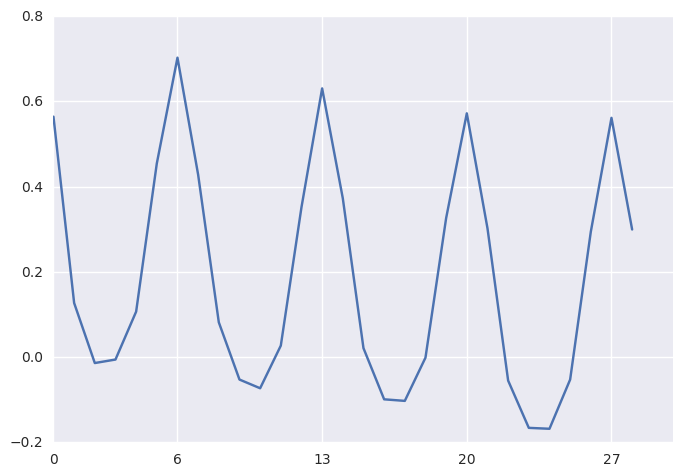

In [467]:
plt.plot(cor)
plt.xticks([0, 6, 13, 20, 27])

In [430]:
for i in range(2, 8):
    df['pays_count_diff_%i' % i] = df.pays_count_1 - df['pays_count_%d' % i]

In [431]:
for i in [3, 5, 7, 14]:
    rolling = df.pays_count_1.rolling(i)
    df['pays_count_mean_%d' % i] = rolling.mean()
    df['pays_count_min_%d' % i] = rolling.min()
    df['pays_count_max_%d' % i] = rolling.max()

In [297]:
from sklearn.linear_model import Lasso, Ridge

In [432]:
df['val'] = 0
df.iloc[-14:, df.columns.get_loc('val')] = 1

In [433]:
df = df.iloc[14:]

In [311]:
from natsort import natsorted

In [434]:
features = natsorted(set(df.columns) - {'day', 'shop_id', 'val', 'pays_count'})

In [435]:
df_train = df[df.val == 0]
df_val = df[df.val == 1]

In [436]:
y_train = df_train.pays_count.values
y_val = df_val.pays_count.values

In [437]:
X_train = df_train[features].values
X_val = df_val[features].values

In [438]:
from sklearn.metrics import mean_squared_error

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [439]:
X_train.shape, X_val.shape

((380, 32), (100, 32))

In [440]:
for a in [0.01, 0.1, 1, 3, 5, 7, 10, 15, 20]:
    lr = Ridge(alpha=a, random_state=1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    print('%5s, %.4f' % (a, rmse(y_val, y_pred)))

 0.01, 78.8931
  0.1, 78.8658
    1, 78.6519
    3, 78.4668
    5, 78.5293
    7, 78.7283
   10, 79.1543
   15, 79.9759
   20, 80.7860


In [441]:
a = 5
lr = Ridge(alpha=a, random_state=1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
print('%5s, %.4f' % (a, rmse(y_val, y_pred)))

    5, 78.5293


In [442]:
list(zip(features, lr.coef_))

[('dow_0', -88.340094649192665),
 ('dow_1', -7.5185805987342809),
 ('dow_2', -28.2844536895742),
 ('dow_3', -39.596465681445196),
 ('dow_4', 11.438773311926793),
 ('dow_5', 92.943564720819708),
 ('dow_6', 59.357256586197806),
 ('pays_count_1', 0.066073876587328856),
 ('pays_count_2', -0.072637963852206916),
 ('pays_count_3', -0.022187467236692342),
 ('pays_count_4', 0.020912008674551858),
 ('pays_count_5', 0.043506366789246576),
 ('pays_count_6', 0.071629019507718952),
 ('pays_count_7', 0.045154824373429867),
 ('pays_count_diff_2', 0.13871184030093509),
 ('pays_count_diff_3', 0.088261344015750878),
 ('pays_count_diff_4', 0.045161867852038011),
 ('pays_count_diff_5', 0.022567509584974433),
 ('pays_count_diff_6', -0.0055551433384907851),
 ('pays_count_diff_7', 0.020919051342265311),
 ('pays_count_max_3', 0.16803105716049821),
 ('pays_count_max_5', -0.25789146601341478),
 ('pays_count_max_7', 0.35389678235470179),
 ('pays_count_max_14', -0.11102937131146785),
 ('pays_count_mean_3', -0.009

In [339]:
import seaborn as sns

/home/agrigorev/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


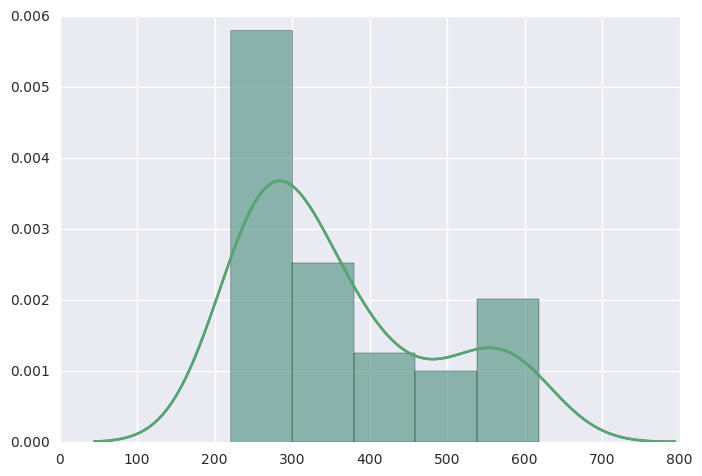

In [341]:
sns.distplot(y_pred)
sns.distplot(y_val)